In [140]:
import sys
sys.path.insert(0,"../..")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis.get_results import read_df, get_performance_profiles

# Circle Instance Results

In [141]:
df_in = read_df("../../data/res/random_circle.txt")
df_in.head()

,name,n,s,p,solver,strategy,recovered_coords,partitions,ratio,time_limit,objval,bound,gap,cuts,setup_time,solve_time,total_time
0,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,60,3307.968869,3414.064775,0.032073,2700,0.071,60.025037,60.096037
1,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,120,3307.968869,3410.408910,0.030968,2700,0.071,120.030535,120.101535
2,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,300,3307.968869,3405.151411,0.029378,2775,0.071,300.056507,300.127507
3,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,600,3307.968869,3400.529338,0.027981,2925,0.071,600.011834,600.082834
4,dp_circle_1,100,5,10,coordpar,random,99,75,0.75,30,3305.817862,3423.631414,0.035638,2400,0.072,30.001188,30.073188


In [142]:
df_in["ratio"].unique()

array([0.75, 0.5 , 0.25, 0.  , 0.74, 0.24])

There are some issues with the ratio, need to round $0.74\to 0.75$ and $0.24\to 0.25$

In [143]:
df = df_in.copy()
df.loc[df["ratio"]==0.74,"ratio"]=0.75
df.loc[df["ratio"]==0.24,"ratio"]=0.25
df["ratio"].unique()

array([0.75, 0.5 , 0.25, 0.  ])

In [144]:
df.head()

,name,n,s,p,solver,strategy,recovered_coords,partitions,ratio,time_limit,objval,bound,gap,cuts,setup_time,solve_time,total_time
0,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,60,3307.968869,3414.064775,0.032073,2700,0.071,60.025037,60.096037
1,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,120,3307.968869,3410.408910,0.030968,2700,0.071,120.030535,120.101535
2,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,300,3307.968869,3405.151411,0.029378,2775,0.071,300.056507,300.127507
3,dp_circle_0,100,5,10,coordpar,random,99,75,0.75,600,3307.968869,3400.529338,0.027981,2925,0.071,600.011834,600.082834
4,dp_circle_1,100,5,10,coordpar,random,99,75,0.75,30,3305.817862,3423.631414,0.035638,2400,0.072,30.001188,30.073188


In [145]:
savefig = False
fig_dir = "../../docs/paper/fig"

# Plot Style Guide

In [146]:
CM = dict(zip(df['strategy'].unique(),[mpl.colormaps["Set1"](i) for i in range(len(df['strategy'].unique()))]))
LS = dict(zip(np.sort(df['ratio'].unique())[::-1],["-","--","-.",":","-","--"]))
MS = dict(zip(np.sort(df['ratio'].unique())[::-1],["o","^","D","x","",""]))
LS[0] = "-"
MS[0] = ""

# Confirm size

In [147]:
tab = df[df["time_limit"]==600].pivot_table(index=["s","n","p"],columns=["solver","strategy","ratio"],values="solve_time",aggfunc="size")
tab

strategy random           stratified             na     
ratio      0.25 0.50 0.75       0.25 0.50 0.75 0.00 0.00
s n   p                                                 
2 50  5       5    5    5          5    5    5    5    5
      10      5    5    5          5    5    5    5    5
  100 10      5    5    5          5    5    5    5    5
      20      5    5    5          5    5    5    5    5
5 50  5       5    5    5          5    5    5    5    5
      10      5    5    5          5    5    5    5    5
  100 10      5    5    5          5    5    5    5    5
      20      5    5    5          5    5    5    5    5

In [148]:
_df = df[(df["time_limit"]==600)]
_df["solved"] = _df["total_time"] < 600
tab = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="gap")
tab = tab[[
            (      'ct',         'na',  0.0),
            (  'glover',         'na',  0.0),
            ('coordpar',     'random', 0.25),
            ('coordpar',     'random',  0.5),
            ('coordpar',     'random', 0.75),
            ('coordpar', 'stratified', 0.25),
            ('coordpar', 'stratified',  0.5),
            ('coordpar', 'stratified', 0.75),
            ]]
tab *= 100
tab = tab.round(2)
tab = tab.style.format('{:.2f}')
print(tab.to_latex(multirow_align="naive",convert_css=True))
display(tab)
tab = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="solved",aggfunc="sum")
tab = tab[[
            (      'ct',         'na',  0.0),
            (  'glover',         'na',  0.0),
            ('coordpar',     'random', 0.25),
            ('coordpar',     'random',  0.5),
            ('coordpar',     'random', 0.75),
            ('coordpar', 'stratified', 0.25),
            ('coordpar', 'stratified',  0.5),
            ('coordpar', 'stratified', 0.75),
            ]]
print(tab.style.to_latex(multirow_align="naive",convert_css=True))
display(tab)

\begin{tabular}{llrrrrrrrr}
 & solver & ct & glover & \multicolumn{6}{r}{coordpar} \\
 & strategy & na & na & \multicolumn{3}{r}{random} & \multicolumn{3}{r}{stratified} \\
 & ratio & 0.000000 & 0.000000 & 0.250000 & 0.500000 & 0.750000 & 0.250000 & 0.500000 & 0.750000 \\
s & n &  &  &  &  &  &  &  &  \\
2 & 50 & 0.68 & 29.47 & 0.07 & 0.03 & 0.03 & 0.06 & 0.04 & 0.02 \\
 & 100 & 1.34 & 129.43 & 0.48 & 0.44 & 0.44 & 0.46 & 0.42 & 0.40 \\
5 & 50 & 7.37 & 23.85 & 1.79 & 0.80 & 1.40 & 1.42 & 0.87 & 1.20 \\
 & 100 & 4.67 & 107.67 & 2.19 & 1.92 & 1.92 & 2.19 & 1.86 & 1.89 \\
\end{tabular}



/tmp/ipykernel_29086/1048924980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df["solved"] = _df["total_time"] < 600


\begin{tabular}{llrrrrrrrr}
 & solver & ct & glover & \multicolumn{6}{r}{coordpar} \\
 & strategy & na & na & \multicolumn{3}{r}{random} & \multicolumn{3}{r}{stratified} \\
 & ratio & 0.000000 & 0.000000 & 0.250000 & 0.500000 & 0.750000 & 0.250000 & 0.500000 & 0.750000 \\
s & n &  &  &  &  &  &  &  &  \\
2 & 50 & 4 & 5 & 6 & 8 & 8 & 7 & 6 & 8 \\
 & 100 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
5 & 50 & 0 & 5 & 1 & 3 & 1 & 0 & 3 & 1 \\
 & 100 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{tabular}



solver     ct glover coordpar                               
strategy   na     na   random           stratified          
ratio    0.00   0.00     0.25 0.50 0.75       0.25 0.50 0.75
s n                                                         
2 50        4      5        6    8    8          7    6    8
  100       0      0        0    0    0          0    0    0
5 50        0      5        1    3    1          0    3    1
  100       0      0        0    0    0          0    0    0

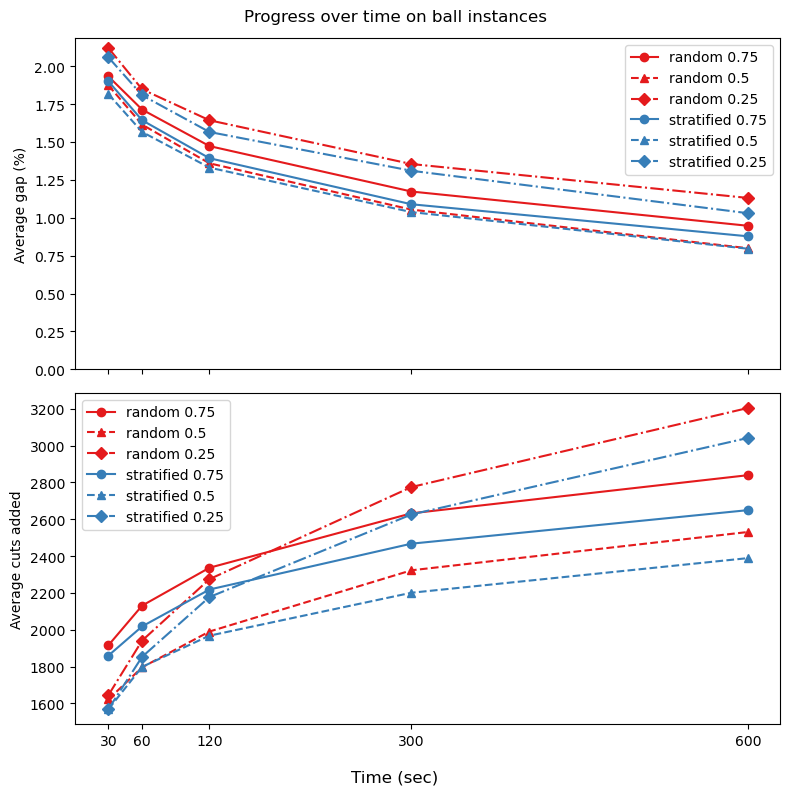

In [149]:
_df = df[df["solver"]=="coordpar"]
fig,axes = plt.subplots(2,figsize=(8,8),sharex=True)
for st in _df["strategy"].unique():
    for r in _df[_df["strategy"]==st]["ratio"].unique():
        G = _df[(_df["strategy"]==st) & (_df["ratio"]==r)].groupby(by=["time_limit"])["gap"].mean() * 100
        axes[0].plot(G,color=CM[st],ls=LS[r],marker=MS[r],label=f"{st} {r}")
        G = _df[(_df["strategy"]==st) & (_df["ratio"]==r)].groupby(by=["time_limit"])["cuts"].mean()
        axes[1].plot(G,color=CM[st],ls=LS[r],marker=MS[r],label=f"{st} {r}")
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].set_xticks([30,60,120,300,600])
axes[0].set_ylabel("Average gap (%)")
axes[1].set_ylabel("Average cuts added")
axes[0].legend()
axes[1].legend()
fig.supxlabel("Time (sec)")
fig.suptitle("Progress over time on ball instances")
plt.tight_layout()
if savefig: 
    plt.savefig(f"{fig_dir}/pp_ball.pdf")
plt.show()